In [201]:
import os

folder_prod = os.listdir("../con blur/Con produccion")
folder_sin_prod = os.listdir("../con blur/Sin produccion")

print(folder_prod,folder_sin_prod)

['2019-11-12 09-29 enfriamiento1.csv', '2019-11-13 12-57 enfriamiento1.csv', '2019-11-05 16-18 enfriamiento1.csv', '2019-11-13 12-54 enfriamiento1.csv', '2019-11-13 11-06 enfriamiento1.csv'] ['2019-11-04 12-48 enfriamiento1.csv', '1 -  enfriamiento.csv']


In [202]:
#Files con Produccion
df_list = []
df_names = []
for file in folder_prod:

    bd=sqlContext.read.format("com.databricks.spark.csv").option("header","false").load(
    "file:/home/luca/Desktop/Tecnocom/csvs/con blur/Con produccion/"+str(file))
    
    df_prod = bd.toPandas().transpose().reset_index()
    df_prod = df_prod.drop(columns="index")
    df_names.append(file)
    df_list.append(df_prod)
    



In [203]:
#Files sin Produccion
df_list_np = []
df_names_np = []
for file1 in folder_sin_prod:

    bd1=sqlContext.read.format("com.databricks.spark.csv").option("header","false").load(
    "file:/home/luca/Desktop/Tecnocom/csvs/con blur/Sin produccion/"+str(file1))
    
    df_np = bd1.toPandas().transpose().reset_index()
    df_np = df_np.drop(columns="index")
    df_names_np.append(file1)
    df_list_np.append(df_np)
    

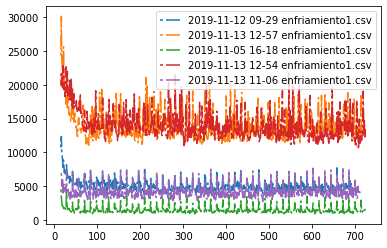

In [211]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
i = 0

for df in df_list:

    x = df.index.values[15:].astype(int)
    y = df[0].values[15:].astype(float)

    line1 = ax.plot(x , y, dashes=[2, 2, 10, 2], label=df_names[i])
    #line1.set_dashes([2, 2, 10, 2])
    i += 1
    
ax.legend()
plt.show()
    

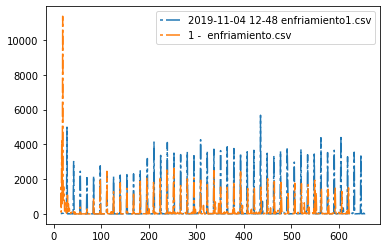

In [212]:
fig, ax = plt.subplots()
i = 0
for df in df_list_np:

    x = df.index.values[15:].astype(int)
    y = df[0].values[15:].astype(float)

    line1 = ax.plot(x , y, dashes=[2, 2, 10, 2], label=df_names_np[i])
    #line1.set_dashes([2, 2, 10, 2])
    i += 1
    
ax.legend()
plt.show()

In [119]:
#Analisis de valores cada 75 frames (5 seg) para detectar algun patron de comportamiento
i = 0
for file in df_list_np:
    print(df_names_np[i],file.astype(float).describe())
    i += 1

2019-11-04 12-48 enfriamiento1.csv                   0
count    656.000000
mean     423.204268
std     3671.784682
min        0.000000
25%        7.000000
50%       12.000000
75%       20.000000
max    90041.000000
1 -  enfriamiento.csv                   0
count    627.000000
mean     445.081340
std     3924.808726
min        0.000000
25%        9.000000
50%       17.000000
75%       53.000000
max    90041.000000


In [215]:
import numpy as np
import pandas as pd
i = 0
lista = []
total_prod = []
for file in df_list:
    
    for data in file.values:
        lista.append(data)
        
        if i % 75 == 0:
            lista = pd.DataFrame(lista).astype(int)
            total_prod.append(lista.min())
            print(lista.describe())
            lista = []
        i += 1
            

             0
count      1.0
mean   90041.0
std        NaN
min    90041.0
25%    90041.0
50%    90041.0
75%    90041.0
max    90041.0
                  0
count     75.000000
mean    8557.960000
std     6853.267393
min     4022.000000
25%     5588.000000
50%     6325.000000
75%     8724.500000
max    51031.000000
                 0
count    75.000000
mean   5388.546667
std     653.542680
min    4207.000000
25%    4940.500000
50%    5390.000000
75%    5775.500000
max    7388.000000
                 0
count    75.000000
mean   5162.200000
std     671.576021
min    3870.000000
25%    4674.500000
50%    5107.000000
75%    5469.000000
max    7492.000000
                 0
count    75.000000
mean   4817.293333
std     599.092033
min    3764.000000
25%    4430.000000
50%    4761.000000
75%    5018.000000
max    7095.000000
                 0
count    75.000000
mean   4841.120000
std     564.060519
min    3751.000000
25%    4503.000000
50%    4762.000000
75%    4964.000000
max    6684.000000
 

In [218]:
import numpy as np
import pandas as pd
i = 0
lista = []
total_np = []
for file in df_list_np:
    for data in file.values:
        lista.append(data)
        
        if i % 75 == 0:
            lista = pd.DataFrame(lista).astype(int)
            total_np.append(lista.min())
            print(lista.describe())
            
            lista = []
        i += 1

             0
count      1.0
mean   90041.0
std        NaN
min    90041.0
25%    90041.0
50%    90041.0
75%    90041.0
max    90041.0
                  0
count     75.000000
mean     436.746667
std     2051.161557
min        0.000000
25%        4.000000
50%       11.000000
75%       48.500000
max    16749.000000
                 0
count    75.000000
mean    159.306667
std     582.889980
min       0.000000
25%       3.000000
50%       5.000000
75%       7.000000
max    2766.000000
                 0
count    75.000000
mean    273.373333
std     860.813832
min       0.000000
25%       4.000000
50%       6.000000
75%      10.500000
max    4135.000000
                 0
count    75.000000
mean    259.133333
std     903.766717
min       4.000000
25%      10.000000
50%      13.000000
75%      21.500000
max    4108.000000
                0
count    75.00000
mean    270.28000
std     957.74134
min       5.00000
25%      10.00000
50%      15.00000
75%      20.50000
max    4268.00000
          

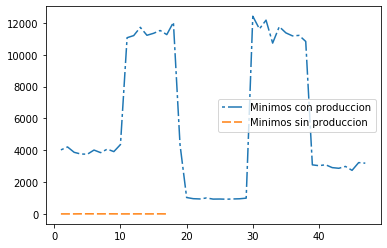

In [238]:
import pandas as pd

df_total_prod = pd.DataFrame(total_prod)
df_total_np = pd.DataFrame(total_np)

fig, ax = plt.subplots()

x = df_total_prod.index.values[1:].astype(int)
y = df_total_prod[0].values[1:].astype(float)

line1 = ax.plot(x , y, dashes=[2, 2, 10, 2], label="Minimos con produccion")


x = df_total_np.index.values[1:].astype(int)
y = df_total_np[0].values[1:].astype(float)

line2 = ax.plot(x, y, dashes=[6, 2], label="Minimos sin produccion")

ax.legend()
plt.show()

In [240]:
df_total_prod[0].values[1:].astype(int)
df_total_np[0].values[1:].astype(int)

array([0, 0, 0, 4, 5, 4, 2, 4, 3, 0, 0, 1, 2, 0, 1, 3, 0])

In [127]:
import numpy as np
import time

def in_production(list):
    


time.sleep(5)
while (True):
    
    